# Dwave Tunable Inductor

The resonant frequency of a tank circuit formed by an inductor $L$ and capacitor $C$ is given by $f = \frac{1}{2\pi\sqrt{LC}}$

The un-biased resonant frequency is given by $f_0$. 

Josephson Kinetic Inductance is $L_J$ and it is equal to $L_J= \frac{\phi_0}{2\pi I_C \sqrt{1-\frac{I}{I_c}}}$

Assuming small current relative to the critical current: $L_{sq}= \frac{L_J}{2 \cos{\frac{\pi \phi}{\phi_0}}}= \frac{\phi_0}{4 \pi I_C  \cos{\frac{\pi \phi}{\phi_0}}}$

Ref: https://ieeexplore.ieee.org/document/8661687





the resonance frequency is equal to 6488498384.978719


Text(0, 0.5, 'Tune flux (\\phi_0)')

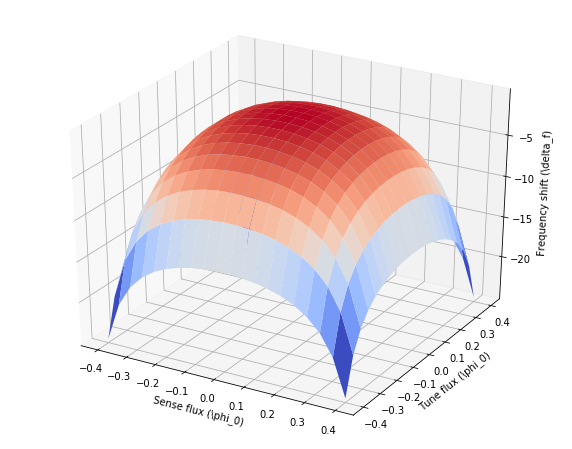

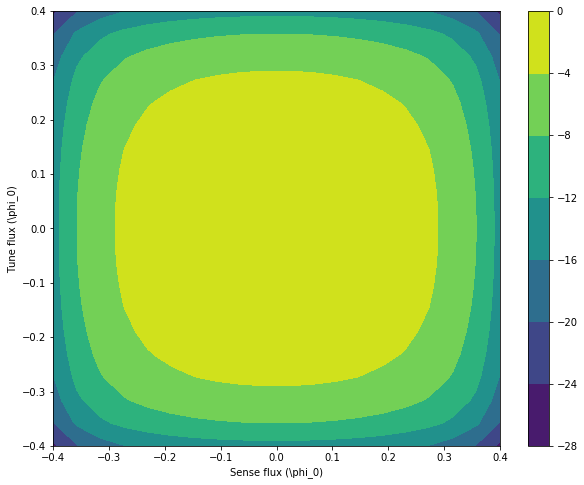

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

## Problem parameters
L_g = 324e-12 ## (Fig. 6)
C_s = 1.7e-12 ## (Fig. 6)
Q_c = 338 ##(Fig. 6)
I_c = 11e-6 ## (Fig. 6)
Q_r= 300

# Solve for the resonant frequency
phi_0 = 2.0678e-15 #In Weber
phi_S = np.linspace(-0.4*phi_0,0.4*phi_0,20)
phi_T = np.linspace(-0.4*phi_0,0.4*phi_0,20)

phi_SS, phi_TT = np.meshgrid(phi_S, phi_T, indexing='ij')

#in case of variable flux
L_S = phi_0/(4*np.pi*I_c * abs(np.cos(np.pi*phi_SS/phi_0)))
L_T = phi_0/(4*np.pi*I_c * abs(np.cos(np.pi*phi_TT/phi_0)))

#in case of zero flux 
L_S0 = phi_0/(4*np.pi*I_c)
L_T0 = phi_0/(4*np.pi*I_c)

f_0 = 1/(np.sqrt((L_g+L_S0+L_T0)*C_s)*2*np.pi)
f = 1/(np.sqrt((L_g+L_S+L_T)*C_s)*2*np.pi)

delta_f = f_0/Q_r
print('The resonance frequency is equal to',f_0)
shift = (f-f_0)/delta_f

## Do the plots
## For 3d plot I used the tutorial https://matplotlib.org/3.1.0/gallery/mplot3d/surface3d.html

fig1 = plt.figure(figsize=(10,8))
ax1 = fig1.gca(projection = '3d')
surf1 = ax1.plot_surface(phi_SS/phi_0, phi_TT/phi_0, shift, cmap=cm.coolwarm)
ax1.set_xlabel('Sense flux (\phi_0)')
ax1.set_ylabel('Tune flux (\phi_0)')
ax1.set_zlabel('Frequency shift (\delta_f)')

## For contour plot I used the tutorial https://www.python-course.eu/matplotlib_contour_plot.php
fig2 = plt.figure(figsize=(10,8))
cp=plt.contourf(phi_SS/phi_0, phi_TT/phi_0, shift)
plt.colorbar(cp)
ax2=fig2.gca()
ax2.set_xlabel('Sense flux (\phi_0)')
ax2.set_ylabel('Tune flux (\phi_0)')